In [1]:
# Gerekli Kütüphanelerin Yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Veri setini yükleme
url= 'https://raw.githubusercontent.com/cagriemreakin/Machine-Learning/master/2%20-%20Classification/1-%20Logistic%20Regression/sosyal_ag_reklamlari.csv'
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,Kullanici Kimligi,Cinsiyet,Yas,Tahmini Maas,Satin alinmis mi
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadin,26,43000,0
3,15603246,Kadin,27,57000,0
4,15804002,Erkek,19,76000,0


In [4]:
# Bağımlı ve bağımsız değişkenlerin seçimi
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Eğitim ve Test Setlerine Ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#y_train kategorik bağımlı değişken olduğundan scale etmiyoruz.

C:\Users\ceakn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
# Logistic Regresion modeli ile verimizi eğitme
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#Test sonuçlarının tahmini
y_pred = clf.predict(X_test)

In [9]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[56,  2],
       [ 5, 17]])

In [10]:
# 56 ve 17 doğru tahminler 2,5 yanlış

In [11]:
print("Doğruluk Oranı: %",((56+17) /80)*100)

Doğruluk Oranı: % 91.25


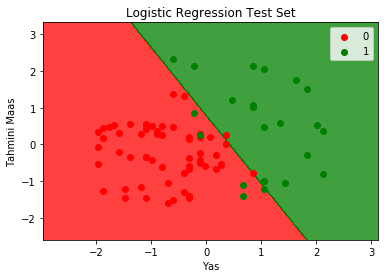

In [12]:
# Test Sonuçlarının Görselleştirilmesi
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression Test Set')
plt.xlabel('Yas')
plt.ylabel('Tahmini Maas')
plt.legend()
plt.show()